# Preface


## Preparing data

In this part we will load data, inspect it and do some basic cleaning.

In [1]:
ls

Summer Olympic medallists 1896 to 2008 - COUNTRY NOC CODE.csv
Summer Olympic medallists 1896 to 2008 - EDITIONS.csv
medals.tsv
summer_olympics_raw.ipynb
summer_olympics_story.ipynb


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()

In [3]:
medals = pd.read_csv('medals.tsv', sep='\t', 
                     skiprows=[0, 1, 2, 3])
medals.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [4]:
medals.tail()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold
29215,Beijing,2008,Wrestling,Wrestling Gre-R,"BAROEV, Khasan",RUS,Men,96 - 120kg,M,Silver


Now the data is correctly loaded. From its columns we can see it's already in tidy shape. Let's see if there is any missing values.

In [5]:
medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
City            29216 non-null object
Edition         29216 non-null int64
Sport           29216 non-null object
Discipline      29216 non-null object
Athlete         29216 non-null object
NOC             29216 non-null object
Gender          29216 non-null object
Event           29216 non-null object
Event_gender    29216 non-null object
Medal           29216 non-null object
dtypes: int64(1), object(9)
memory usage: 2.2+ MB


There's no missing values indicated by np.nan.   
However all columns are of "object" type, which might be unnecessary if there's limited levels in that column. Let's check it.

In [6]:
for col in medals.columns:
    print(col, '    ', medals[col].nunique())

City      22
Edition      26
Sport      42
Discipline      56
Athlete      21413
NOC      138
Gender      2
Event      577
Event_gender      3
Medal      3


We can cast some of the columns into "category" dtype. This can save us memory and allow some pandas operations to run faster.

In [7]:
to_convert = ['City', 'Sport','Discipline', 
              'NOC', 'Gender','Event_gender', 'Medal']

for col in to_convert:
    medals[col] = medals[col].astype('category')
    
medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
City            29216 non-null category
Edition         29216 non-null int64
Sport           29216 non-null category
Discipline      29216 non-null category
Athlete         29216 non-null object
NOC             29216 non-null category
Gender          29216 non-null category
Event           29216 non-null object
Event_gender    29216 non-null category
Medal           29216 non-null category
dtypes: category(7), int64(1), object(2)
memory usage: 915.2+ KB


The memory usage is reduced by more than a half. Nice!

From the number of unique level of each column we can tell some more interesting information:  
* There's 26 editions of Summer Olympics, held by 22 cities. At most 4 cities held the big game more than one time.  
* There are 42 kinds of sport, 56 kinds of discipline, and 577 kinds of event. The number is increasing because the latter one is one form of the former one.  
* 21413 athletes are sharing 29216 medals, there are many who won multiple medals.  
* 22 cities but 138 NOC? It confuses me at first, but later I realize NOC might be representing the nationality of the athlete who won the medal, rather than the country held the game.   

I have thought of some questions we can look into:  
* Which city(cities) held Summer Olympic more than once?  
* Which NOC has the most medals in total? And by medal type?
* How's the distribution of number of athletes who won different amounts of medals looks like?
* Event_gender has 3 different values, is it a typo? Or some case where event_gender cannot be represented in male or female?
* What are the countries that won medals in most sports?
* During the Cold War(1952 - 1988), how did USA and USSR perform compared to each other?
* What is the general trend of number of medals each edition?

## 1 Which city(cities) held Summer Olympic more than once?

The code below does these things:
* Keep only the unique 'City'-'Edition' pair value in dataframe medals.
* Count the occurences of each city, to see which cities held Summer Olympic more than once.
* Use the city name list to filter out the responding edition as they held the game.

In [8]:
host_cities = medals[['City', 'Edition']].drop_duplicates().set_index('Edition')

In [9]:
host_cities['City'].value_counts().head()

Los Angeles    2
Athens         2
Paris          2
London         2
Tokyo          1
Name: City, dtype: int64

In [10]:
mask = medals.City.isin(['Los Angeles', 'Athens', 'Paris', 'London'])

In [11]:
medals[mask][['City', 'Edition']].drop_duplicates()

,City,Edition
0,Athens,1896
151,Paris,1900
1133,London,1908
4120,Paris,1924
5714,Los Angeles,1932
7204,London,1948
16592,Los Angeles,1984
25176,Athens,2004


4 cities held Summer Olympics more than once, they are Athens(1896, 2004), London(1908, 1948), Los Angeles(1932, 1984) and Paris(1900, 1924).  


### 下面这段不知哪来的，暂且保留

In [12]:
md_by_city = medals.City.value_counts()

md_by_city.head(10)

Athens         2149
Los Angeles    2074
Beijing        2042
Sydney         2015
Atlanta        1859
Barcelona      1705
London         1618
Seoul          1546
Paris          1396
Moscow         1387
Name: City, dtype: int64

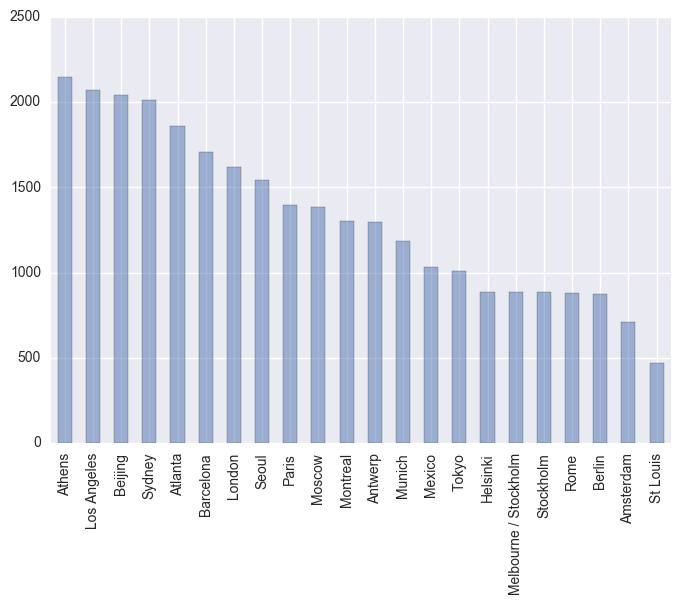

In [13]:
md_by_city.plot(kind='bar', alpha=0.5)

## 2 Which NOC won the most medals in total? And by medal type?

* List the top 10 countries ranking by the total number of their medals.
* Transform the medals dataframe to tell number of each type of medals each country won.

In [14]:
medals.groupby('NOC')['Medal'].count().sort_values(ascending=False).head(10)

NOC
USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
Name: Medal, dtype: int64

In [85]:
noc_by_mdtype = medals.pivot_table(index='NOC', 
                                   columns='Medal', 
                                   values='Athlete', 
                                   aggfunc='count'
                                )

noc_by_mdtype['total'] = noc_by_mdtype.sum(axis=1)

noc_by_mdtype = noc_by_mdtype.sort_values('total', ascending=False)

noc_by_mdtype.head(10)

Medal,Bronze,Gold,Silver,total
NOC,,,,
USA,1052.0,2088.0,1195.0,4335.0
URS,584.0,838.0,627.0,2049.0
GBR,505.0,498.0,591.0,1594.0
FRA,475.0,378.0,461.0,1314.0
ITA,374.0,460.0,394.0,1228.0
GER,454.0,407.0,350.0,1211.0
AUS,413.0,293.0,369.0,1075.0
HUN,345.0,400.0,308.0,1053.0
SWE,325.0,347.0,349.0,1021.0


## 3 How's the distribution of number of athletes who won different amounts of medals looks like?
There are 21413 athletes sharing 29216 medals, indicating some athletes winning more than 1 medals.
The code snippet below does these things:
* Count medals won by each athlete.
* To witness how many athletes there are of each medal counts level.
* List the name of top 20 athletes ranking by their medal counts.

In [16]:
md_by_ath = medals.groupby('Athlete')['Medal'].count()

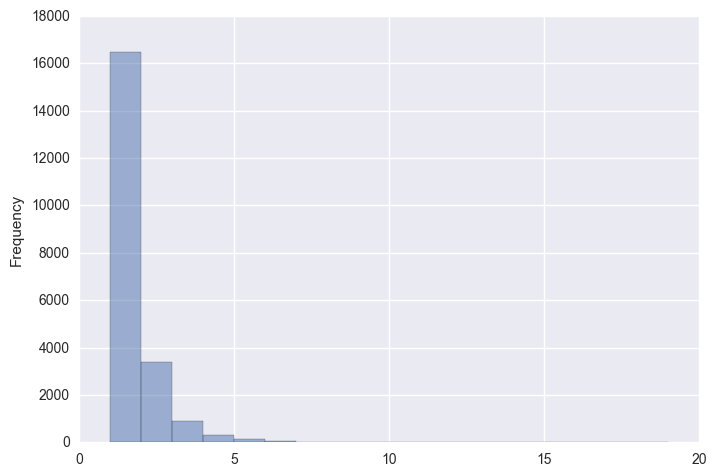

In [17]:
md_by_ath.plot(kind='hist',
               range=(0, 19),
               bins=19, 
               alpha=0.5)

In [20]:
md_by_ath.sort_values(ascending=False).head(20)

Athlete
LATYNINA, Larisa              18
PHELPS, Michael               16
ANDRIANOV, Nikolay            15
MANGIAROTTI, Edoardo          13
SHAKHLIN, Boris               13
ONO, Takashi                  13
NURMI, Paavo                  12
TORRES, Dara                  12
KATO, Sawao                   12
NEMOV, Alexei                 12
THOMPSON, Jenny               12
FISCHER, Birgit               12
CHUKARIN, Viktor Ivanovich    11
BIONDI, Matthew               11
SPITZ, Mark                   11
COUGHLIN, Natalie             11
OSBURN, Carl Townsend         11
CASLAVSKA, Vera               11
VAN ALMSICK, Franziska        10
ASTAKHOVA, Polina             10
Name: Medal, dtype: int64

The vast of the medal winners won one and only one medal uptill 2008, but there are someone exrtaordinary won as much as 18s!

## 4 Event_gender has 3 different values, is the third kind a typo?   
Or some case where event_gender cannot be represented in male or female?

I'm doing the belowing things here:
* Find out the unique value of 'Event_gender' column and each of their occurences.
* Find out the unique value of 'Event_gender'-'Gender' pair and count each of their occurences.
* Inspect the suspicious row.
* Try to find out what does it mean when 'Event_gender'=='X'.

In [21]:
medals.Event_gender.unique()

[M, X, W]
Categories (3, object): [M, X, W]

In [22]:
medals.Event_gender.value_counts()

M    20067
W     7278
X     1871
Name: Event_gender, dtype: int64

In [23]:
md_by_gender = medals.groupby(['Event_gender', 'Gender'])['Medal'].count()
md_by_gender

Event_gender  Gender
M             Men       20067
W             Men           1
              Women      7277
X             Men        1653
              Women       218
Name: Medal, dtype: int64

In [25]:
medals[(medals['Gender']=='Men') & (medals['Event_gender']=='W')]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
23675,Sydney,2000,Athletics,Athletics,"CHEPCHUMBA, Joyce",KEN,Men,marathon,W,Bronze


Do some google search we can find that "CHEPCHUMBA, Joyce" is a woman. The 'Gender' column for her is wrong.  


### inspect rows where 'Event_gender' == 'X'
As when 'Event_gender' is 'X', there are many observations of men and women, what are these event? Are they sports that requires mixed gender?

In [26]:
eg_X = medals[medals['Event_gender']=='X']

print(eg_X['Sport'].unique())
print('\n')
print(eg_X['Discipline'].unique())
print('\n')
print(eg_X['Event'].unique())

[Equestrian, Sailing, Tennis, Skating, Shooting, Badminton]
Categories (6, object): [Equestrian, Sailing, Tennis, Skating, Shooting, Badminton]


[Jumping, Sailing, Tennis, Figure skating, Dressage, Eventing, Vaulting, Shooting, Badminton]
Categories (9, object): [Jumping, Sailing, Tennis, Figure skating, ..., Eventing, Vaulting, Shooting, Badminton]


['high jump' 'individual' 'long jump individual' '0.5-1t' '10-20t' '3-10t'
 'open class' 'mixed doubles' '12m' '6m' '7m' '8m' 'pairs' 'team' '10m'
 'mixed doubles indoor' 'figure riding individual' 'figure riding team'
 '10m (rating 1907)' '10m (rating 1919)' '12 foot dinghy'
 '12m (rating 1907)' '12m (rating 1919)' '18 foot dinghy' '30m sq' '40m sq'
 '6.5m (rating 1919)' '6m (rating 1907)' '8m (rating 1907)'
 'olympic class monotype' '12 foot dinghy individual'
 'two-person keelboat open (Star)' 'dragon' 'firefly class'
 'swallow (golondrina)' '5.5m' 'sharpie 12m2' 'flying dutchman'
 'fleet/match race keelboat open (Soling)' 'tempest'
 

Unfortunately I cannot find a codebook specifying what each column means.  
And I can note tell from the unique values of 'Sport', 'Discipline' and 'Event' columns why the 'Event_gender' column contains info of both male and female athletes

## 5 What are the countries that won medals in most sports?  
Instead of counting value, this time we measure the diversity of sports in which one country won medals.

In [232]:
sp_by_noc = medals.groupby('NOC')['Sport'].nunique()

sp_by_noc.sort_values(ascending=False).head(10)

NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
AUS    22
ESP    22
CAN    22
SWE    21
URS    21
Name: Sport, dtype: int64

## 6 During the Cold War(1952 - 1988), how did USA and USSR perform against each other?  
* Compare the performance of USA and URS in terms of total medal won per edition, and then of number of unique sports in which each country won medal per edition.

In [64]:
cold_war = medals.loc[(medals['Edition']>=1952)&(medals['Edition']<=1988)]
cold_war = cold_war.loc[(cold_war['NOC']=='USA')|(cold_war['NOC']=='URS')]

### Compare on total medals

In [65]:
cw_temp = cold_war.groupby(['Edition', 'NOC'])['Medal'].count().unstack('NOC')
cw_temp.head()

NOC,URS,USA
Edition,,
1952,117.0,130.0
1956,169.0,118.0
1960,169.0,112.0
1964,174.0,150.0
1968,188.0,149.0


In [66]:
# convert column type from 'category' to 'object'
# so that we can release 'Edition' from index
cw_temp.columns = cw_temp.columns.astype(str)
cw_temp = cw_temp.reset_index()

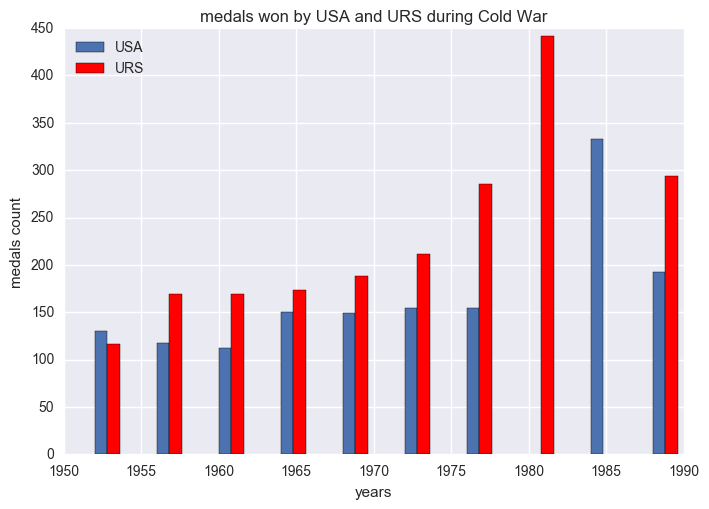

In [67]:
_ = plt.bar(cw_temp['Edition'].values, cw_temp['USA'].values, label='USA')
_ = plt.bar(cw_temp['Edition'].values+0.8, cw_temp['URS'].values, color='red', label='URS')

_ = plt.xlabel('years')
_ = plt.ylabel('medals count')
_ = plt.title('medals won by USA and URS during Cold War')
_ = plt.legend(loc='best')

plt.show()

### Compare on number of unique sports in which each country won medals

In [68]:
cw_temp2 = cold_war.groupby(['Edition', 'NOC'])['Sport'].nunique().unstack('NOC')
cw_temp2

NOC,URS,USA
Edition,,
1952,9.0,11.0
1956,13.0,10.0
1960,15.0,12.0
1964,16.0,13.0
1968,15.0,10.0
1972,19.0,11.0
1976,19.0,13.0
1980,21.0,NaN
1984,NaN,19.0


In [69]:
# convert column type from 'category' to 'object'
# so that we can release 'Edition' from index
cw_temp2.columns = cw_temp2.columns.astype(str)
cw_temp2 = cw_temp2.reset_index()

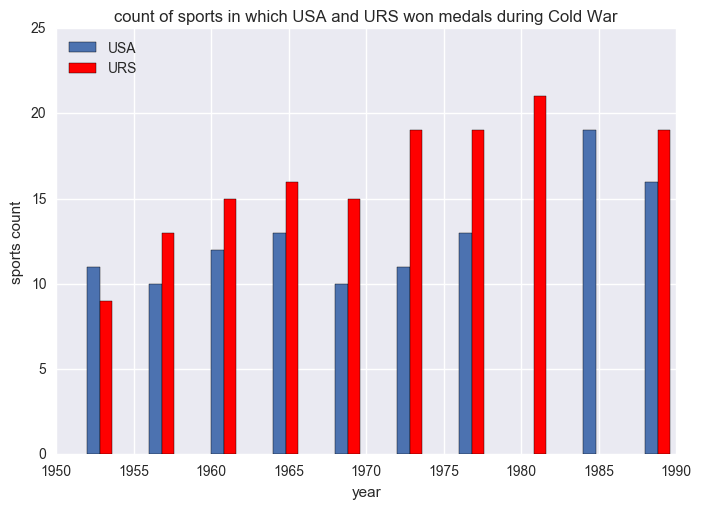

In [70]:
_ = plt.bar(cw_temp2['Edition'], cw_temp2['USA'], label='USA')
_ = plt.bar(cw_temp2['Edition']+0.8, cw_temp2['URS'], 
            color='red', label='URS')

_ = plt.xlabel('year')
_ = plt.ylabel('sports count')
_ = plt.title('count of sports in which USA and URS won medals during Cold War')
plt.legend(loc='best')

plt.show()

In temrs of both total medals and medal-winning sports, the Soviet Union outperformed the United States during cold war.

## 7 What is the general trend of number of medals each edition?

In [71]:
gr_edition = medals.groupby('Edition')

In [72]:
md_by_year = gr_edition['Medal'].count().sort_index()
md_by_year.head(10)

Edition
1896     151
1900     512
1904     470
1908     804
1912     885
1920    1298
1924     884
1928     710
1932     615
1936     875
Name: Medal, dtype: int64

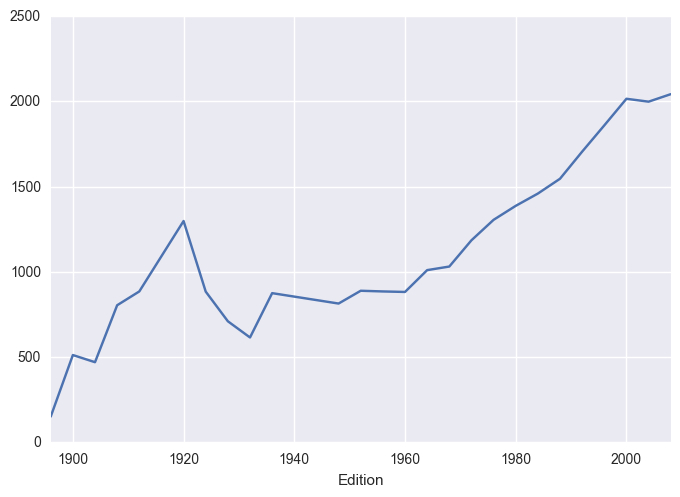

In [73]:
md_by_year.plot()

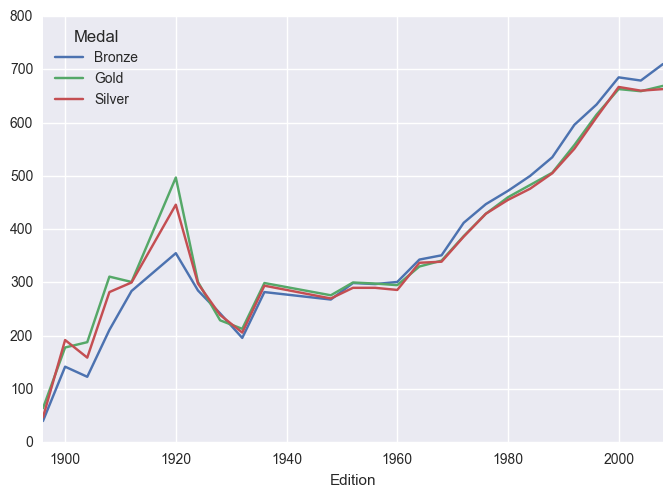

In [74]:
md_type_by_year = medals.pivot_table(index='Edition',
                                     columns='Medal', 
                                     values='Athlete', 
                                    aggfunc='count')
md_type_by_year.plot()

There's a sharp rise right before 1920 in all medal types, and then it quickly falls down. The trend of each type of medal appears the same as the grand trend. What happened?  
* One possible answer is that around 1920 there were many countries pop up to join the game therefore the total medals won increased; then after 1920 some countries quitted.
* Another possibility is around 1920 each country won more medals on average.  
  
  
Let's check this by plotting average medal won by each country each edition.


In [94]:
md_pivot = medals.pivot_table(index='Edition',
                                     columns='NOC', 
                                     values='Athlete', 
                                     aggfunc='count')


In [102]:
# computes total medals by each edition
sum_byed =  md_pivot.sum(axis=1)

In [103]:
# computes total num of participant country by each edition
noc_byed = md_pivot.notnull().sum(axis=1)

In [104]:
# computes avrage number of medals won by each country per edition
avg_byed = sum_byed/noc_byed

Edition
1896    13.727273
1900    25.600000
1904    47.000000
1908    42.315789
1912    49.166667
1920    59.000000
1924    32.740741
1928    22.187500
1932    22.777778
1936    27.343750
1948    22.000000
1952    20.674419
1956    23.289474
1960    20.045455
1964    24.634146
1968    23.431818
1972    24.687500
1976    31.829268
1980    38.527778
1984    31.042553
1988    29.730769
1992    26.640625
1996    23.531646
2000    25.187500
2004    27.000000
2008    23.744186
dtype: float64

In [107]:
sus = pd.concat([noc_byed, sum_byed, avg_byed], axis=1)
sus.head()

,0,1,2
Edition,,,
1896,11,151.0,13.727273
1900,20,512.0,25.600000
1904,10,470.0,47.000000
1908,19,804.0,42.315789
1912,18,885.0,49.166667


In [108]:
sus.columns = ['country_count', 'medals_count', 'avg_medal_per_country']
sus.head()

,country_count,medals_count,avg_medal_per_country
Edition,,,
1896,11,151.0,13.727273
1900,20,512.0,25.600000
1904,10,470.0,47.000000
1908,19,804.0,42.315789
1912,18,885.0,49.166667


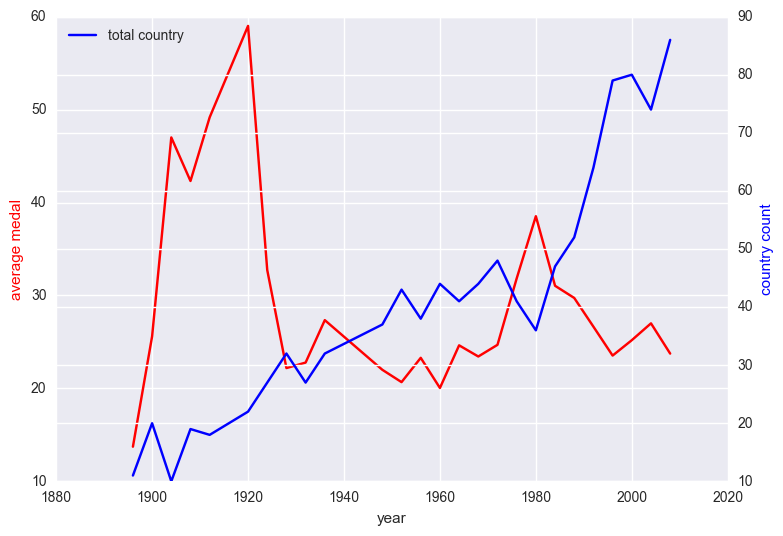

In [112]:
fig, ax1 = plt.subplots()
_ = plt.plot(sus.avg_medal_per_country, color='red',
             label='average medals')
ax1.set_xlabel('year')
ax1.set_ylabel('average medal', color='red')

ax2 = ax1.twinx()
_ = plt.plot(sus.country_count, color='blue', 
             label='total country')
ax2.set_ylabel('country count', color='blue')

plt.legend(loc='best')
fig.tight_layout()
plt.show()

Surprisingly, from 1904 to 1920, on average, each country won a unprecedented high amount of medal compared to other time in history. We know World War I happened during 1914 to 1918, it should be a period with great loss in every aspect, how come the triumph in Olympics?  
  
Let's take a look into the main roles of WWI to see their performance.  
The Allied Powers consist of France, British Empire, Russian Empire(until 1917), Serbia, Montenegro, Belgium, Japan, Italy, Portugal, Romania, Hejaz, United States, Greece and Thailand Siam. And the Central Power consist of Germany, Austria-Hungary, Ottoman Empire and Bulgaria. (source:[WikiPedia](https://en.wikipedia.org/wiki/World_War_I))

In [113]:
allied = ['FRA', 'GBR', 'URS', 'SCG', 'BEL','JPN','ITA','POR', 'ROU','USA','GRE','THA']
central = ['GER', 'AUT', 'HUN', 'BUL']

This list is a little problematic, for some countries do not exist now and don't have a NOC code(e.g. Ottoman Empire, Russian Empire), and some NOC code do not reflect the exact same country in WWI(e.g. 'GER' is Germany for now). But I just list them here, later peel off the NaN columns.

In [114]:
# medal records for Allied Powers
md_allied = md_pivot.loc[1904:1932, allied].dropna(how='all', axis=1)
md_allied

NOC,FRA,GBR,BEL,JPN,ITA,POR,ROU,USA,GRE
Edition,,,,,,,,,
1904,NaN,2.0,NaN,NaN,NaN,NaN,NaN,394.0,2.0
1908,35.0,347.0,31.0,NaN,7.0,NaN,NaN,63.0,3.0
1912,25.0,160.0,19.0,NaN,21.0,NaN,NaN,101.0,2.0
1920,141.0,107.0,188.0,3.0,84.0,NaN,NaN,193.0,5.0
1924,122.0,66.0,38.0,1.0,51.0,3.0,23.0,198.0,NaN
1928,36.0,55.0,5.0,8.0,70.0,NaN,NaN,84.0,NaN
1932,37.0,34.0,NaN,31.0,77.0,NaN,NaN,181.0,NaN


In [115]:
md_allied.sum(axis=1).div(md_by_year.loc[1904:1932])

Edition
1904    0.846809
1908    0.604478
1912    0.370621
1920    0.555470
1924    0.567873
1928    0.363380
1932    0.585366
dtype: float64

France, Belgium, Italy and USA had a major increase in medals, around 1920, and except 1912, these countries won more than half of the total medals!

In [118]:
# medal records for Central Powers
md_central = md_pivot.loc[1904:1932, central].dropna(how='all', axis=1)
md_central

NOC,GER,AUT,HUN
Edition,,,
1904,13.0,1.0,4.0
1908,22.0,1.0,18.0
1912,52.0,14.0,30.0
1920,NaN,NaN,NaN
1924,NaN,4.0,20.0
1928,72.0,4.0,20.0
1932,38.0,5.0,32.0


In [119]:
md_central.sum(axis=1).div(md_by_year.loc[1904:1932])

Edition
1904    0.038298
1908    0.050995
1912    0.108475
1920    0.000000
1924    0.027149
1928    0.135211
1932    0.121951
dtype: float64

As contrast, the 3 countries in Central Powers we could track, takes up only a tiny fraction of the grand total medals per year during WWI.

# Appendix A: Analysis of "manipulating data with pandas" course

## A.1 The total number awarded to China per edition?

In [12]:
medals[medals['NOC']=='CHN'].groupby('Edition')['Athlete'].count()

Edition
1984     76
1988     53
1992     83
1996    110
2000     79
2004     94
2008    184
Name: Athlete, dtype: int64

## A.2 Top 15 countries ranked by total number of medals?

In [17]:
medals.groupby('NOC')['Athlete'].count().sort_values(ascending=False).head(15)

NOC
USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
NED     782
JPN     704
CHN     679
RUS     638
ROU     624
Name: Athlete, dtype: int64

In [18]:
# or, another way
medals['NOC'].value_counts().head(15)

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
NED     782
JPN     704
CHN     679
RUS     638
ROU     624
Name: NOC, dtype: int64

## A.3 How many separate bronze, silver and gold medals each country won?

In [19]:
medals.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [21]:
sep_md = medals.pivot_table(index='NOC', 
                   columns='Medal', 
                   values='Athlete', 
                   aggfunc='count'
                  )
sep_md.head()

Medal,Bronze,Gold,Silver
NOC,,,
AFG,1.0,NaN,NaN
AHO,NaN,NaN,1.0
ALG,8.0,4.0,2.0
ANZ,5.0,20.0,4.0
ARG,88.0,68.0,83.0


In [22]:
sep_md['Total'] = sep_md.sum(axis=1)
sep_md.head()

Medal,Bronze,Gold,Silver,Total
NOC,,,,
AFG,1.0,NaN,NaN,1.0
AHO,NaN,NaN,1.0,1.0
ALG,8.0,4.0,2.0,14.0
ANZ,5.0,20.0,4.0,29.0
ARG,88.0,68.0,83.0,239.0


In [25]:
sep_md.sort_values(by='Total', ascending=False).head(15)

Medal,Bronze,Gold,Silver,Total
NOC,,,,
USA,1052.0,2088.0,1195.0,4335.0
URS,584.0,838.0,627.0,2049.0
GBR,505.0,498.0,591.0,1594.0
FRA,475.0,378.0,461.0,1314.0
ITA,374.0,460.0,394.0,1228.0
GER,454.0,407.0,350.0,1211.0
AUS,413.0,293.0,369.0,1075.0
HUN,345.0,400.0,308.0,1053.0
SWE,325.0,347.0,349.0,1021.0


## A.4 What is the difference of column 'Gender' and column 'Event_gender'?

### find unique pair value

In [26]:
sus = medals[['Gender', 'Event_gender']]

In [28]:
sus.drop_duplicates()

,Gender,Event_gender
0,Men,M
348,Men,X
416,Women,W
639,Women,X
23675,Men,W


诶。。这个方法好。df.drop_duplicates()居然能只保留独特的行（考虑所有列），省去了groupby() -> 只看index的unique value这么多步骤。

### find unique pair-value's occurences

In [29]:
medals.groupby(['Gender', 'Event_gender'])['Athlete'].count()

Gender  Event_gender
Men     M               20067
        W                   1
        X                1653
Women   W                7277
        X                 218
Name: Athlete, dtype: int64

### looking at the suspicious record

In [30]:
medals.loc[(medals['Gender']=='Men')&(medals['Event_gender']=='W')]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
23675,Sydney,2000,Athletics,Athletics,"CHEPCHUMBA, Joyce",KEN,Men,marathon,W,Bronze


## A.5 Which countries won medals in the most distinct sports?

In [32]:
medals.groupby('NOC')['Sport'].nunique().sort_values(ascending=False).head(15)

NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
AUS    22
ESP    22
CAN    22
SWE    21
URS    21
ITA    21
NED    20
RUS    20
JPN    20
DEN    19
Name: Sport, dtype: int64

## A.6 Number of distinct sports in which the USA and the USSR won medals during the Cold War years

In [40]:
pick_ed = (medals.Edition>=1952)&(medals.Edition<=1988)
pick_noc= (medals.NOC=='USA')|(medals.NOC=='URS')

In [41]:
during_cw = medals.loc[pick_ed&pick_noc, :]

In [44]:
during_cw.NOC.unique()

[USA, URS]
Categories (2, object): [USA, URS]

In [53]:
during_cw.groupby('NOC')['Sport'].nunique().sort_values(ascending=False).head()

NOC
URS    21
USA    20
FRA     0
GRE     0
GHA     0
Name: Sport, dtype: int64

不是很明白为什么除了USA和URS的其他国家也在during_cw里，不是已经被pick_noc给排除掉了吗？  
难道说pandas最近有微调。

## A.7 Which country, the USA or the USSR, won the most medals consistently over the Cold War period.

In [57]:
during_cw = during_cw.pivot_table(index='Edition', 
                      columns='NOC', 
                      values='Athlete', 
                      aggfunc='count'
                     )[['USA', 'URS']]
during_cw.head()

NOC,USA,URS
Edition,,
1952,130.0,117.0
1956,118.0,169.0
1960,112.0,169.0
1964,150.0,174.0
1968,149.0,188.0


In [58]:
during_cw.idxmax(axis=1)  # 类似于numpy的array.argmax()
                          # by default return index name of the maximum val
                          # specify axis=1 to return column name

Edition
1952    USA
1956    URS
1960    URS
1964    URS
1968    URS
1972    URS
1976    URS
1980    URS
1984    USA
1988    URS
dtype: object

## A.8  Compare the medal counts by 'Edition' for USA, URS, CHN

In [70]:
mask = (medals.NOC=='USA')|(medals.NOC=='URS')|(medals.NOC=='CHN')

In [71]:
USA_URS_CHN = medals.loc[mask, ['Edition', 'NOC', 'Athlete']]

In [74]:
USA_URS_CHN = USA_URS_CHN.pivot_table(index='Edition', 
                        columns='NOC', 
                        values='Athlete', 
                        aggfunc='count'
                       )
# cannt understand why there is NOC other than (USA, URS, CHN)
# 我明明已经在mask里只选中这三栏了

In [75]:
USA_URS_CHN = USA_URS_CHN[['USA', 'URS', 'CHN']]  # 没办法只好再选一遍

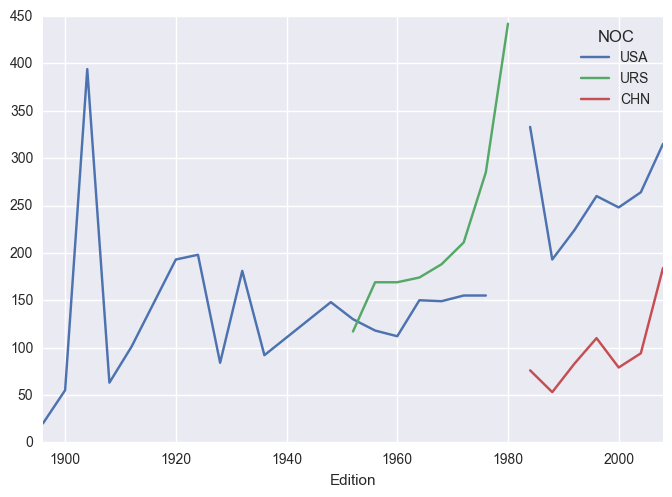

In [76]:
USA_URS_CHN.plot()

## A.9 Visualizing CHN Medal Counts by Edition: Area Plot

In [79]:
CHN = medals[medals.NOC=='CHN']

In [80]:
CHN_byyr = CHN.groupby(['Edition', 'Medal'])['Athlete'].count()

In [81]:
CHN_byyr.head()

Edition  Medal 
1984     Bronze    37
         Gold      26
         Silver    13
1988     Bronze    31
         Gold       6
Name: Athlete, dtype: int64

In [82]:
CHN_byyr = CHN_byyr.unstack(level='Medal')
CHN_byyr

Medal,Bronze,Gold,Silver
Edition,,,
1984,37,26,13
1988,31,6,16
1992,19,18,46
1996,17,19,74
2000,17,39,23
2004,15,52,27
2008,57,74,53


/Users/EzraYang/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


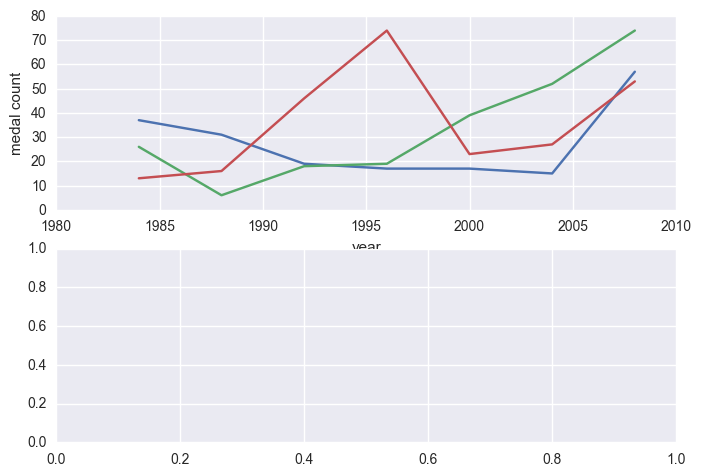

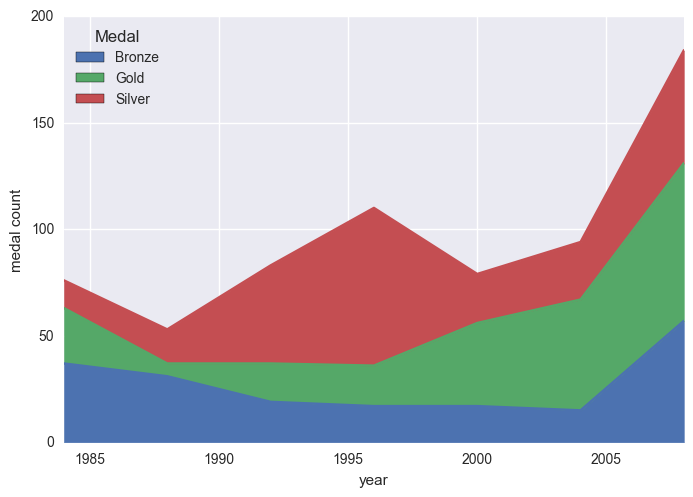

In [84]:
plt.subplot(2, 1, 1)
_ = plt.plot(CHN_byyr)
_ = plt.xlabel('year')
_ = plt.ylabel('medal count')
_ = plt.legend(loc='best')

plt.subplot(2, 1, 2)
_ = CHN_byyr.plot.area()
_ = plt.xlabel('year')
_ = plt.ylabel('medal count')

plt.show()

# 为什么会有三个图啊掩面

## A.10 Change medal orders from 'Bronze','Gold','Silver' to 'Gold', 'Silver', 'Bronze'

In [85]:
CHN_byyr = CHN_byyr[['Gold', 'Silver', 'Bronze']]
CHN_byyr

Medal,Gold,Silver,Bronze
Edition,,,
1984,26,13,37
1988,6,16,31
1992,18,46,19
1996,19,74,17
2000,39,23,17
2004,52,27,15
2008,74,53,57


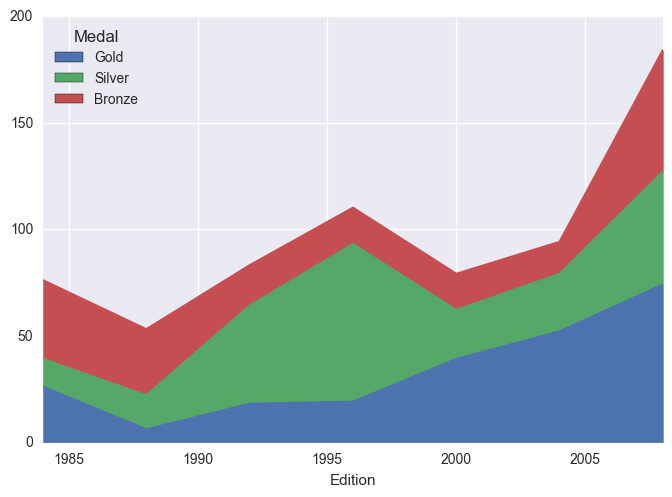

In [86]:
CHN_byyr.plot.area()

# Appendix B: Analysis of "merging data with pandas" course

## B.0 prepare data

In [6]:
pwd

'/Users/EzraYang/Desktop/analysis_projects/summer_olympics'

In [7]:
ls

Summer Olympic medallists 1896 to 2008 - COUNTRY NOC CODE.csv
Summer Olympic medallists 1896 to 2008 - EDITIONS.csv
medals.tsv
project_summer_olympics.ipynb


In [18]:
editions = pd.read_csv('Summer Olympic medallists 1896 to 2008 - EDITIONS.csv')
editions.head()

,Edition,Bronze,Gold,Silver,Grand Total,City,Country
0,1896,40.0,64.0,47.0,151.0,Athens,Greece
1,1900,142.0,178.0,192.0,512.0,Paris,France
2,1904,123.0,188.0,159.0,470.0,St. Louis,United States
3,1908,211.0,311.0,282.0,804.0,London,United Kingdom
4,1912,284.0,301.0,300.0,885.0,Stockholm,Sweden


In [19]:
editions = editions[['Edition', 'Grand Total', 'City', 'Country']]
editions.head()

,Edition,Grand Total,City,Country
0,1896,151.0,Athens,Greece
1,1900,512.0,Paris,France
2,1904,470.0,St. Louis,United States
3,1908,804.0,London,United Kingdom
4,1912,885.0,Stockholm,Sweden


In [12]:
ioc_codes = pd.read_csv('Summer Olympic medallists 1896 to 2008 - COUNTRY NOC CODE.csv')
ioc_codes.head()

,NOC,Country,Bronze,Gold,Silver,Grand Total
0,Grand Total,NaN,9689.0,9850.0,9677.0,29216
1,USA,United States,1052.0,2088.0,1195.0,4335
2,URS,Soviet Union,584.0,838.0,627.0,2049
3,GBR,United Kingdom,505.0,498.0,591.0,1594
4,FRA,France,475.0,378.0,461.0,1314


In [13]:
ioc_codes = ioc_codes[['NOC', 'Country']].drop(0)
ioc_codes.head()

,NOC,Country
1,USA,United States
2,URS,Soviet Union
3,GBR,United Kingdom
4,FRA,France
5,GER,Germany


In [14]:
len(ioc_codes)

138

In [15]:
medals.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [16]:
medals = medals[['Edition', 'Athlete', 'NOC', 'Medal']]
medals.head()

,Edition,Athlete,NOC,Medal
0,1896,"HAJOS, Alfred",HUN,Gold
1,1896,"HERSCHMANN, Otto",AUT,Silver
2,1896,"DRIVAS, Dimitrios",GRE,Bronze
3,1896,"MALOKINIS, Ioannis",GRE,Gold
4,1896,"CHASAPIS, Spiridon",GRE,Silver


## B.1 to see the number of medals each country won in each year

In [17]:
medal_counts = medals.pivot_table(index = 'Edition', 
                                  columns = 'NOC', 
                                  values = 'Athlete', 
                                  aggfunc = 'count'
                                 )
medal_counts.head()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,...,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1900,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,NaN,NaN,...,NaN,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN,34.0
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,394.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0
1908,NaN,NaN,NaN,19.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,10.0,NaN,NaN,NaN,14.0,NaN,NaN,...,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## B.2 each country's medal share in each year

In [24]:
totals = editions.set_index('Edition')['Grand Total']
totals.head()

Edition
1896    151.0
1900    512.0
1904    470.0
1908    804.0
1912    885.0
Name: Grand Total, dtype: float64

In [32]:
medal_counts.divide(totals, axis=0)

TypeError: unorderable types: str() > int()

In [28]:
medal_counts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 1896 to 2008
Columns: 138 entries, AFG to ZZX
dtypes: float64(138)
memory usage: 28.2 KB


In [30]:
medal_counts.index

Int64Index([1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948,
            1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992,
            1996, 2000, 2004, 2008],
           dtype='int64', name='Edition')

In [31]:
totals.index

Index([       '1896',        '1900',        '1904',        '1908',
              '1912',        '1920',        '1924',        '1928',
              '1932',        '1936',        '1948',        '1952',
              '1956',        '1960',        '1964',        '1968',
              '1972',        '1976',        '1980',        '1984',
              '1988',        '1992',        '1996',        '2000',
              '2004',        '2008', 'Grand Total',           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           

In [34]:
totals = totals.loc['1896':'2008']

In [38]:
medal_counts.head()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,...,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1900,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,NaN,NaN,...,NaN,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN,34.0
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,394.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0
1908,NaN,NaN,NaN,19.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,10.0,NaN,NaN,NaN,14.0,NaN,NaN,...,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
totals.index == medal_counts.index

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False], dtype=bool)

In [42]:
totals.index

Index(['1896', '1900', '1904', '1908', '1912', '1920', '1924', '1928', '1932',
       '1936', '1948', '1952', '1956', '1960', '1964', '1968', '1972', '1976',
       '1980', '1984', '1988', '1992', '1996', '2000', '2004', '2008'],
      dtype='object', name='Edition')

In [43]:
medal_counts.index

Int64Index([1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948,
            1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992,
            1996, 2000, 2004, 2008],
           dtype='int64', name='Edition')

In [44]:
totals.index = totals.index.astype(int)

In [45]:
# 终于算出来了
medal_counts.divide(totals, axis='rows').head()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,0.013245,0.033113,NaN,NaN,...,NaN,NaN,0.132450,NaN,NaN,NaN,NaN,NaN,NaN,0.039735
1900,NaN,NaN,NaN,NaN,NaN,NaN,0.009766,0.011719,NaN,NaN,...,NaN,NaN,0.107422,NaN,NaN,NaN,NaN,NaN,NaN,0.066406
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002128,NaN,NaN,...,NaN,NaN,0.838298,NaN,NaN,NaN,NaN,NaN,NaN,0.017021
1908,NaN,NaN,NaN,0.023632,NaN,NaN,NaN,0.001244,NaN,NaN,...,NaN,NaN,0.078358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,0.011299,NaN,NaN,NaN,0.015819,NaN,NaN,...,NaN,NaN,0.114124,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
fractions = medal_counts.divide(totals, axis='rows')

In [47]:
fractions.tail()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1992,NaN,NaN,0.001173,NaN,0.001173,NaN,0.033431,0.003519,NaN,0.000587,...,NaN,NaN,0.131378,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,0.001614,NaN,0.010758,0.001076,0.071006,0.001614,0.000538,0.002690,...,NaN,NaN,0.139860,0.001076,NaN,NaN,0.013986,0.000538,NaN,NaN
2000,NaN,NaN,0.002481,NaN,0.009926,0.000496,0.090819,0.001985,0.001489,0.002978,...,NaN,0.000496,0.123077,0.001985,NaN,0.000496,0.012903,NaN,NaN,NaN
2004,NaN,NaN,NaN,NaN,0.023524,NaN,0.078579,0.004004,0.002503,0.001001,...,NaN,NaN,0.132132,0.002503,0.001001,NaN,NaN,NaN,0.001502,NaN
2008,0.00049,NaN,0.000979,NaN,0.024976,0.002938,0.072968,0.001469,0.003428,0.002449,...,NaN,NaN,0.154261,0.002938,0.000490,0.000490,NaN,NaN,0.001959,NaN


## B.3 how the fraction of medals won changes from edition to edition

To see if there is a host country advantage, you first want to see how the fraction of medals won changes from edition to edition.  
The expanding mean provides a way to see this down each column. It is the value of the mean with all the data available up to that point in time.

In [48]:
# Apply the expanding mean: mean_fractions
mean_fractions = fractions.expanding().mean()

mean_fractions.head()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,0.013245,0.033113,NaN,NaN,...,NaN,NaN,0.132450,NaN,NaN,NaN,NaN,NaN,NaN,0.039735
1900,NaN,NaN,NaN,NaN,NaN,NaN,0.011505,0.022416,NaN,NaN,...,NaN,NaN,0.119936,NaN,NaN,NaN,NaN,NaN,NaN,0.053071
1904,NaN,NaN,NaN,NaN,NaN,NaN,0.011505,0.015653,NaN,NaN,...,NaN,NaN,0.359390,NaN,NaN,NaN,NaN,NaN,NaN,0.041054
1908,NaN,NaN,NaN,0.023632,NaN,NaN,0.011505,0.012051,NaN,NaN,...,NaN,NaN,0.289132,NaN,NaN,NaN,NaN,NaN,NaN,0.041054
1912,NaN,NaN,NaN,0.017466,NaN,NaN,0.011505,0.012804,NaN,NaN,...,NaN,NaN,0.254131,NaN,NaN,NaN,NaN,NaN,NaN,0.041054


In [50]:
# Compute the percentage change: fractions_change
fractions_change = mean_fractions.pct_change() * 100

fractions_change.head()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900,NaN,NaN,NaN,NaN,NaN,NaN,-13.134766,-32.304688,NaN,NaN,...,NaN,NaN,-9.448242,NaN,NaN,NaN,NaN,NaN,NaN,33.561198
1904,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-30.169386,NaN,NaN,...,NaN,NaN,199.651245,NaN,NaN,NaN,NaN,NaN,NaN,-22.642384
1908,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-23.013510,NaN,NaN,...,NaN,NaN,-19.549222,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1912,NaN,NaN,NaN,-26.092774,NaN,NaN,0.000000,6.254438,NaN,NaN,...,NaN,NaN,-12.105733,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [51]:
# Reset the index of fractions_change: fractions_change
fractions_change = fractions_change.reset_index()


In [52]:
# Print first & last 5 rows of fractions_change
print(fractions_change.head())
print(fractions_change.tail())

NOC  Edition  AFG  AHO  ALG        ANZ  ARG  ARM        AUS        AUT  AZE  \
0       1896  NaN  NaN  NaN        NaN  NaN  NaN        NaN        NaN  NaN   
1       1900  NaN  NaN  NaN        NaN  NaN  NaN -13.134766 -32.304688  NaN   
2       1904  NaN  NaN  NaN        NaN  NaN  NaN   0.000000 -30.169386  NaN   
3       1908  NaN  NaN  NaN        NaN  NaN  NaN   0.000000 -23.013510  NaN   
4       1912  NaN  NaN  NaN -26.092774  NaN  NaN   0.000000   6.254438  NaN   

NOC    ...      URS  URU         USA  UZB  VEN  VIE  YUG  ZAM  ZIM        ZZX  
0      ...      NaN  NaN         NaN  NaN  NaN  NaN  NaN  NaN  NaN        NaN  
1      ...      NaN  NaN   -9.448242  NaN  NaN  NaN  NaN  NaN  NaN  33.561198  
2      ...      NaN  NaN  199.651245  NaN  NaN  NaN  NaN  NaN  NaN -22.642384  
3      ...      NaN  NaN  -19.549222  NaN  NaN  NaN  NaN  NaN  NaN   0.000000  
4      ...      NaN  NaN  -12.105733  NaN  NaN  NaN  NaN  NaN  NaN   0.000000  

[5 rows x 139 columns]
NOC  Edition  AFG  AH

## B.4 Building hosts DataFrame

In [61]:
hosts = pd.merge(editions, ioc_codes, how='left')
hosts.head()

,Edition,Grand Total,City,Country,NOC
0,1896,151.0,Athens,Greece,GRE
1,1900,512.0,Paris,France,FRA
2,1904,470.0,St. Louis,United States,USA
3,1908,804.0,London,United Kingdom,GBR
4,1912,885.0,Stockholm,Sweden,SWE


In [62]:
hosts = hosts[['Edition', 'NOC']].set_index('Edition')
hosts.head()

,NOC
Edition,
1896,GRE
1900,FRA
1904,USA
1908,GBR
1912,SWE


In [63]:
hosts.isnull()

,NOC
Edition,
1896,False
1900,False
1904,False
1908,False
1912,False
1920,False
1924,False
1928,False
1932,False


In [64]:
hosts.index

Index([       '1896',        '1900',        '1904',        '1908',
              '1912',        '1920',        '1924',        '1928',
              '1932',        '1936',        '1948',        '1952',
              '1956',        '1960',        '1964',        '1968',
              '1972',        '1976',        '1980',        '1984',
              '1988',        '1992',        '1996',        '2000',
              '2004',        '2008', 'Grand Total',           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           

In [65]:
hosts = hosts.loc['1896':'2008']
hosts.index = hosts.index.astype(int)

In [66]:
hosts.loc[1972, 'NOC'] = 'FRG'
hosts.loc[1980, 'NOC'] = 'URS'
hosts.loc[1988, 'NOC'] = 'KOR'

In [67]:
hosts

,NOC
Edition,
1896,GRE
1900,FRA
1904,USA
1908,GBR
1912,SWE
1920,BEL
1924,FRA
1928,NED
1932,USA


## B.5 reshape the fractions_change DataFrame (for later to be joined with hosts)

In [68]:
fractions_change.head()

NOC,Edition,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
0,1896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1900,NaN,NaN,NaN,NaN,NaN,NaN,-13.134766,-32.304688,NaN,...,NaN,NaN,-9.448242,NaN,NaN,NaN,NaN,NaN,NaN,33.561198
2,1904,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-30.169386,NaN,...,NaN,NaN,199.651245,NaN,NaN,NaN,NaN,NaN,NaN,-22.642384
3,1908,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-23.013510,NaN,...,NaN,NaN,-19.549222,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
4,1912,NaN,NaN,NaN,-26.092774,NaN,NaN,0.000000,6.254438,NaN,...,NaN,NaN,-12.105733,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [69]:
reshaped = pd.melt(fractions_change, id_vars = 'Edition', value_name='Change')
reshaped.head()

,Edition,NOC,Change
0,1896,AFG,NaN
1,1900,AFG,NaN
2,1904,AFG,NaN
3,1908,AFG,NaN
4,1912,AFG,NaN


In [70]:
reshaped.tail()

,Edition,NOC,Change
3583,1992,ZZX,0.0
3584,1996,ZZX,0.0
3585,2000,ZZX,0.0
3586,2004,ZZX,0.0
3587,2008,ZZX,0.0


## B.6 find out the percentage change of host countries

In [72]:


hosts.head()

,NOC
Edition,
1896,GRE
1900,FRA
1904,USA
1908,GBR
1912,SWE


In [74]:
hosts = hosts.reset_index()

In [75]:
hosts.head()

,Edition,NOC
0,1896,GRE
1,1900,FRA
2,1904,USA
3,1908,GBR
4,1912,SWE


In [73]:
reshaped.head()

,Edition,NOC,Change
0,1896,AFG,NaN
1,1900,AFG,NaN
2,1904,AFG,NaN
3,1908,AFG,NaN
4,1912,AFG,NaN


In [76]:
merged = pd.merge(hosts, reshaped, how='left')
merged

,Edition,NOC,Change
0,1896,GRE,NaN
1,1900,FRA,198.002486
2,1904,USA,199.651245
3,1908,GBR,134.489218
4,1912,SWE,71.896226
5,1920,BEL,54.757887
6,1924,FRA,2.046362
7,1928,NED,36.315243
8,1932,USA,3.739184
9,1936,GER,24.108011


In [77]:
influence = merged.set_index('Edition')
influence.head()

,NOC,Change
Edition,,
1896,GRE,NaN
1900,FRA,198.002486
1904,USA,199.651245
1908,GBR,134.489218
1912,SWE,71.896226


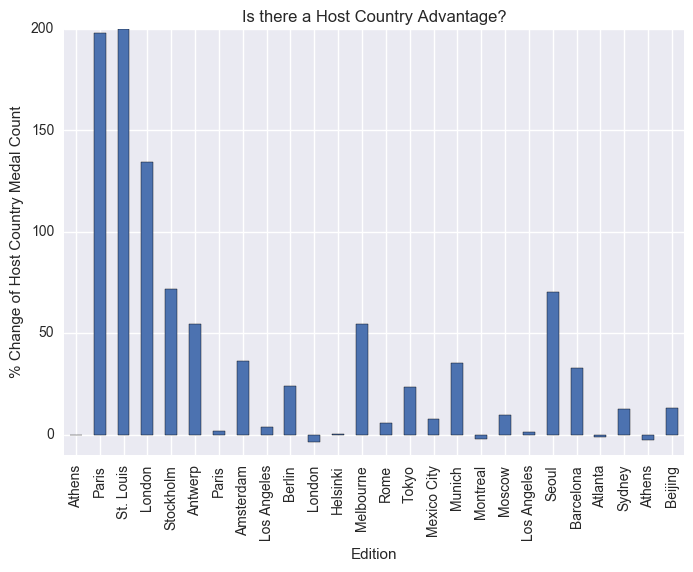

In [96]:
# Make bar plot of change: ax
ax = influence['Change'].plot(kind='bar')

# Customize the plot to improve readability
ax.set_ylabel("% Change of Host Country Medal Count")
ax.set_title("Is there a Host Country Advantage?")
ax.set_xticklabels(editions['City'])

_ = plt.ylim(-10, 200)

plt.margins(0.02)

# Display the plot
plt.show()

In [91]:
influence[influence['NOC']=='CHN']

,NOC,Change
Edition,,
2008,CHN,13.251332
